In [8]:
import geopandas as gpd
import json
from shapely.geometry import MultiPoint
import pyproj

# Leer el archivo JSON
with open('marcadores (1).json', 'r', encoding='utf-8') as f:
    data = json.load(f)

features = data['features']

In [10]:
geometries = []
properties = []

# Iterar a través de cada feature en el JSON
for feature in features:
    coords = feature['geometry']['coordinates']
    geometry = MultiPoint(coords)
    geometries.append(geometry)
    properties.append(feature['properties'])

In [13]:
# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(properties, geometry=geometries)

<Axes: >

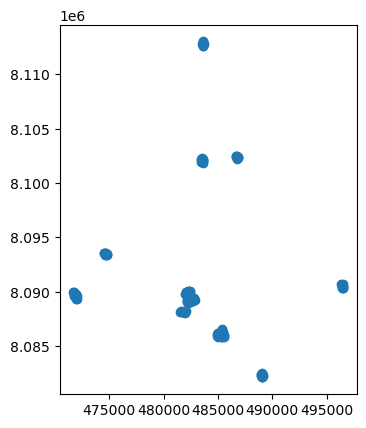

In [20]:
gdf.plot()

In [17]:
# Establecer la proyección geográfica original (WGS84)
gdf.set_crs(epsg=4326, inplace=True)

,tarea,identificador,value,geometry
0,"{'id': 47403, 'titulo': 'FLAMBOYAN--AGUILERA-L...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.498, 0.551, 0.539, 0.599, 0.668, 0.618, 0.6...","MULTIPOINT (-63.26567 -17.27507, -63.26639 -17..."
1,"{'id': 47409, 'titulo': 'SANTA BARBARA-L28,1',...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.355, 0.446, 0.474, 0.583, 0.535, 0.5, 0.538...","MULTIPOINT (-63.16857 -17.27491, -63.16732 -17..."
2,"{'id': 47407, 'titulo': 'LA ESTACADA--AGUILERA...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.491, 0.424, 0.553, 0.5, 0.533, 0.53, 0.608,...","MULTIPOINT (-63.23975 -17.24283, -63.23777 -17..."
3,"{'id': 47405, 'titulo': 'SAN JOSE--CATALA-L43'...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.271, 0.359, 0.439, 0.504, 0.599, 0.688, 0.6...","MULTIPOINT (-63.15384 -17.16476, -63.15556 -17..."
4,"{'id': 47402, 'titulo': '6 DE AGOSTO--DAMIANA-...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.355, 0.433, 0.4, 0.517, 0.69, 0.654, 0.654,...","MULTIPOINT (-63.15396 -17.06729, -63.15370 -17..."
5,"{'id': 47404, 'titulo': 'NAVIDAD--ROCA GIL VIC...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.495, 0.41, 0.584, 0.681, 0.713, 0.727, 0.87...","MULTIPOINT (-63.03374 -17.27036, -63.03327 -17..."
6,"{'id': 47415, 'titulo': 'SANTA MARTHA-C7,1', '...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.369, 0.432, 0.579, 0.53, 0.574, 0.531, 0.52...","MULTIPOINT (-63.12572 -17.16243, -63.12549 -17..."
7,"{'id': 47412, 'titulo': 'LAS LOMAS-3HNOS DEL O...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.289, 0.398, 0.535, 0.535, 0.693, 0.656, 0.6...","MULTIPOINT (-63.17084 -17.29136, -63.17274 -17..."
8,"{'id': 47414, 'titulo': 'SANTA BARBARA--CRONEN...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.354, 0.434, 0.493, 0.58, 0.515, 0.568, 0.62...","MULTIPOINT (-63.14093 -17.30899, -63.14123 -17..."
9,"{'id': 47406, 'titulo': 'LA CUTA--JUSTINIANO-A...","[Marcador 0, Marcador 1, Marcador 2, Marcador ...","[0.153, 0.597, 0.591, 0.649, 0.645, 0.657, 0.6...","MULTIPOINT (-63.10362 -17.34312, -63.10314 -17..."


In [19]:
# Convertir a la proyección UTM (por ejemplo, zona 21S)
gdf = gdf.to_crs(epsg=32720)

In [21]:
# Guardar como shapefile
gdf.to_file('output_shapefile.shp', driver='ESRI Shapefile')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21040\963992395.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('output_shapefile.shp', driver='ESRI Shapefile')


ValueError: Invalid field type <class 'list'>

In [ ]:






print("Shapefile exportado exitosamente.")

In [23]:
import geopandas as gpd
import json
from shapely.geometry import MultiPoint

# Leer el archivo JSON
with open('marcadores (1).json', 'r', encoding='utf-8') as f:
    data = json.load(f)

features = data['features']

# Crear listas para almacenar las geometrías y propiedades
geometries = []
properties = []

# Iterar a través de cada feature en el JSON
for feature in features:
    coords = feature['geometry']['coordinates']
    geometry = MultiPoint(coords)
    geometries.append(geometry)
    
    prop = feature['properties']
    # Aplanar los valores de 'identificador' y 'value' para que sean compatibles con shapefile
    prop_flattened = {k: (v[0] if isinstance(v, list) else v) for k, v in prop.items()}
    properties.append(prop_flattened)

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(properties, geometry=geometries)

# Renombrar las columnas para que no excedan los 10 caracteres
gdf = gdf.rename(columns={
    'tarea': 'task',
    'identificador': 'idtf',
    'value': 'val'
})

# Establecer la proyección geográfica original (WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Convertir a la proyección UTM (zona 20S)
gdf = gdf.to_crs(epsg=32720)

# Guardar como shapefile
output_path = 'output_shapefile.shp'
gdf.to_file(output_path, driver='ESRI Shapefile')

print(f"Shapefile exportado exitosamente a {output_path}.")


Shapefile exportado exitosamente a output_shapefile.shp.


In [24]:
import geopandas as gpd
import json
from shapely.geometry import Point

# Leer el archivo JSON
with open('marcadores (1).json', 'r', encoding='utf-8') as f:
    data = json.load(f)

features = data['features']

# Crear listas para almacenar las geometrías y propiedades
geometries = []
properties = []

# Iterar a través de cada feature en el JSON
for feature in features:
    coords = feature['geometry']['coordinates']
    props = feature['properties']
    
    for i, coord in enumerate(coords):
        geometry = Point(coord)
        prop = {k: (v[i] if isinstance(v, list) else v) for k, v in props.items()}
        geometries.append(geometry)
        properties.append(prop)

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(properties, geometry=geometries)

# Renombrar las columnas para que no excedan los 10 caracteres
gdf = gdf.rename(columns={
    'tarea': 'task',
    'identificador': 'idtf',
    'value': 'val'
})

# Establecer la proyección geográfica original (WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Convertir a la proyección UTM (zona 20S)
gdf = gdf.to_crs(epsg=32720)

# Guardar como shapefile
output_path = 'output_shapefile.shp'
gdf.to_file(output_path, driver='ESRI Shapefile')

print(f"Shapefile exportado exitosamente a {output_path}.")


Shapefile exportado exitosamente a output_shapefile.shp.
